# Problem set 1: Solving the consumer problem

In this first problem set, we will take a look at solving the canonical utility maximization problem for the consumer.  

**Problem set structure:** 
* Each problem set consists of tasks and problems. _Tasks_ train you in using specific techniques, while _problems_ train you in solving actual economic problems. 
* Each problem set also contains solutions, which can be found in separate Python files.
* The Python files `A[..].py` do not run out of the box. But you can copy the code into your notebook or user module. 
* *You should really try to solve the tasks and problems on your own before looking at the answers!* 
* You goal should, however, not be to write everything from scratch. 
* Finding similar code from the lectures and adjusting it is completely ok. I rarely begin  completely from scratch, I figure out when I last did something similar and copy in the code to begin with. A quick peak at the solution, and then trying to write the solution yourself is also a very beneficial approach.

**Multiple solutions:** Within the field of numerical analysis there is often many more than one way of solving a specific problem. So the solution provided is just one example. If you get the same result, but use another approach, that might be just as good (or even better).

**Extra problems:** Solutions to the extra problems are not provided, but we encourage you to take a look at them if you have the time.

# Tasks

## functions

Implement a Python version of this function:

$$ 
u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} 
$$

In [27]:
# In the solution there is default parameter values for alpha and beta which is needed later for printing out a table

# It does not really make sense to define alpha and beta as variables within the function (local scope)
# Firstly, because it wouldn't be necessary to include alpha and beta in as parameters in the fundtion
# Secondly, because you wouldn't have the chance to overwrite it later
# alpha = 0.5
# beta = 1

def u(x1,x2,alpha,beta):   # u(x1,x2,alpha=0.5,beta=1):
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

# alpha and beta set in A2

**Answer:** see A1.py

## print

In [28]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

In [48]:
# Define variables alpha and beta (if alpha and beta wasn't default parameter values in task A1)

alpha = 0.5
beta = 1

def print_table(x1_vec,x2_vec):
    
    # a. empty text
    # initializes an empty string that will be used to accumulate the text for the table
    text = ''                               
    
    # b. top header
    text += f'{"":3s}'   # essentially adds three empty spaces to the beginning of the text in the top header
    
    # starts a loop that iterates over the elements in x2_vec along with their indices. The enumerate() method adds a counter 
    # and returns it in the form of an enumerating object: both the index (j) and the value (x2) from the vector
    for j, x2 in enumerate(x2_vec):         
       text += f'{j:6d}'   # ensures each index, j, is right-aligned with a width of 6
    text += '\n'           # line shift - moves the cursor to the next line, preparing for the body of the table
    
    # c. body
    # responsible for creating the main body of the table and left header

    # starts a loop that iterates over the elements in x1_vec along with their indices
    for i, x1 in enumerate(x1_vec):         
        if i > 0:                                  # conditional statement – ensures that each new row starts on a new line
            text += '\n'                           # line shift
        text += f'{i:3d} '                         # left header – ensures that the left header is right-aligned with a width of 3
        for j, x2 in enumerate(x2_vec):            # nested loop – iterates over the elements in x2_vec along with their indices
            # If alpha and beta were set as parameter values in A1, it would not be necessary to add the parameters in the f-string below
            text += f'{u(x1,x2,alpha,beta):6.3f}'  # calls the function u(x1, x2) to obtain a value, and then formats the result to a string with a width of 6 and precision of 3 decimal places using the format specifier ':6.3f'
                                                   # the formatted value is added to the text-variable
    # d. print
    print(text)

print_table(x1_vec,x2_vec)

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


In [50]:
# How to only print the column of some element in x2_vector from the following code?

def print_table(x1_vec, x2_vec, index_no):
    # a. empty text
    text = ''  # initializes an empty string called text that will be used to accumulate the text for the table

    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
        if j == index_no:   # Added this line and 
            text += f'{j:6d}'
    text += '\n'   # line shift

    # c. body
    # responsible for creating the main body of the table
    for i, x1 in enumerate(x1_vec):
        if i > 0:
            text += '\n'    # line shift
        text += f'{i:3d} '  # left header

        # Only print the 3rd column in x2_vec
        j = index_no
        x2 = x2_vec[j]
        text += f'{u(x1, x2, alpha, beta):6.3f}'

    # d. printing
    print(text)

print_table(x1_vec, x2_vec, 2)

        2
  0  1.442
  1  1.661
  2  2.300
  3  2.396
  4  2.641


**Answer:** see A2.py

## matplotlib

Reproduce the figure below of $u(x_1,x_2)$ using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [31]:
# import plot modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# plt.style.use('seaborn-whitegrid') – the 'seaborn-whitegrid' style didn't work for me, to check which styles you have run: print(plt.style.available)
# print(plt.style.available)
plt.style.use('seaborn-v0_8-whitegrid')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps


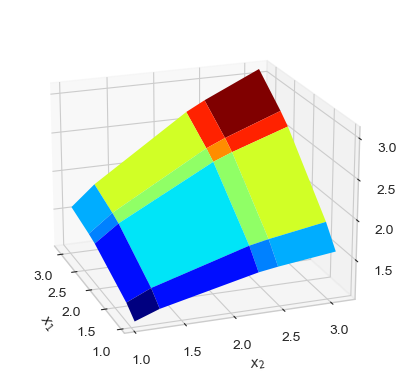

In [32]:
# np.meshgrid(): creates a rectangular grid out of two given one-dimensional arrays (matrices)

# evaluate utility function
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij') # creates a 2d grid of coordinates for 1d vector x1_vec and x2_vec
                                                           # indexing='ij' parameter specifies that the returned grid should have matrix indexing, where the first index refers to rows (i index corresponds to x1_grid) and the second index refers to columns (j index corresponds to x2_grid)
u_grid = u(x1_grid,x2_grid,alpha=0.5,beta=1)               # the utility function is applied to every pair of coordinates in the 2d grid 

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet)        # cmap=cm.jet specifies the color map to be used for the plot

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$utility,u$')

# c. invert xaxis
ax.invert_xaxis()

ax.view_init(elev=20, azim=-20)
# fig.tight_layout()

**Answer:** see A3.py

## optimize

Consider the following minimization problem:

$$
\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2
$$

Solve this problem and illustrate your results.

Best with the loop method is: -0.88366802 at x = -1.51515152
Best with scipy.optimize is:  -0.88786283 at x = -1.42756250


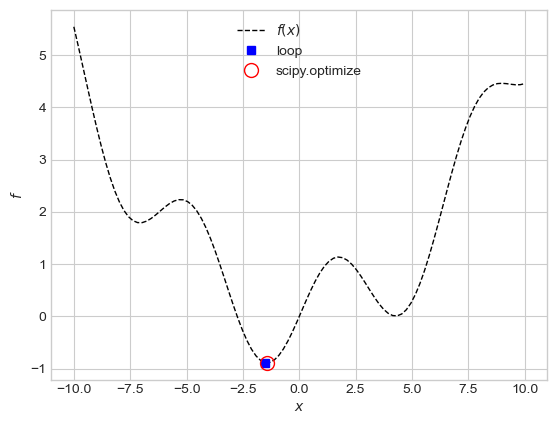

In [54]:
import numpy as np

# a. define function
def f(x):
    return np.sin(x)+0.05*x**2 

# b. solution using a loop
N = 100
x_vec = np.linspace(-10,10,N) # returns N evenly spaced samples, calculated over the interval [start, stop]=[-10,10]
f_vec = np.empty(N)

f_best = np.inf # initial maximum - floating point representation of positive infinity
x_best = np.nan # not-a-number

for i,x in enumerate(x_vec): # iterates over each index 'i' and corresponding 'x' value in the array x_vec
    f_now = f_vec[i] = f(x)  # calculates the function value for the current x and assigns it to f_now - also stored in the f_vec array at the corresponding index i
    if f_now < f_best:       # checks if current function value (f_now) is smaller than the current best function value (f_best)
        x_best = x           # if true, updates x_best to the current x value
        f_best = f_now       # updates f_best to the current function value (f_now)

# c. solution using scipy optmize
from scipy import optimize
x_guess = [0]      
# missing line, hint: objective_function = lambda x: ?
# missing line, hint: res = optimize.minimize(?)
# x_best_scipy = res.x[0]
# f_best_scipy = res.fun   
objective_function = lambda x: f(x[0]) # takes a single argument x and returns the result of calling the function f() with the first element (x[0]) of the input x
# if you prefer to write "standard" functions instead of lambda functions, simply write:
# def objective_function(x):
#     return f(x[0])
res = optimize.minimize(objective_function, x_guess, method='Nelder-Mead')
x_best_scipy = res.x[0] # accesses the optimized value of x (the first element) from the result
f_best_scipy = res.fun  # accesses the value of the objective function at the minimum
                        # fun is a calleble parameter from scipy.optimize.minimize
# d. print
print(f'Best with the loop method is: {f_best:.8f} at x = {x_best:.8f}')
print(f'Best with scipy.optimize is:  {f_best_scipy:.8f} at x = {x_best_scipy:.8f}')
# print('Best with the loop method is:',f_best,'at x=',x_best)

# e. figure
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=1,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',color='blue',label='loop')
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markersize=10,markerfacecolor='none',
        markeredgecolor='red',label='scipy.optimize')

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.grid(True) # not strictly necessary
ax.legend(loc='upper center') # parameter in ax.legend() is not necessary - specifies where the legends are placed

**Answer:** see A4.py

# Problem

Consider the following $M$-good, $x=(x_1,x_2,\dots,x_M)$, **utility maximization problem** with exogenous income $I$, and price-vector $p=(p_1,p_2,\dots,p_M)$,

$$
\begin{aligned}
V(p_{1},p_{2},\dots,,p_{M},I) & = \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E & = \sum_{i=1}^{M}p_{i}x_{i} \leq I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq 0
\end{aligned}
$$

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, $ \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)$, prices and income. First, with a loop, and then with a numerical optimizer.

You can use the following functions:

In [55]:
def utility_function(x, alpha):
    # ensure you understand what this function is doing

    u = 1 # the value that gets multiplied and accumulated in the loop
    for x_now, alpha_now in zip(x, alpha): # zip() takes iterables, aggregates them in a tuple, and returns it: languages = [x1, x2], versions = [14, 3] -> [(x1, 14), (, 3)]
        u *= np.max(x_now,0)**alpha_now
    return u
    
def expenditures(x, p):
    # ensure you understand what this function is doing

    E = 0
    for x_now, p_now in zip(x,p):
        E += p_now * x_now
    return E

def print_solution(x, alpha, I, p):
    # you can just use this function
    
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

In [35]:
x_list = [1, 3, 4] # [x1, x2, x3]
alpha = [0.5, 0.5]

list_zip = zip(x_list, alpha)

zipped_list = list(list_zip)
print(zipped_list)

[(1, 0.5), (3, 0.5)]


You can initially use the following parameter choices:

In [36]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

Solving with a loop:

In [37]:
N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # vector betweein 0 and 1
x_max = I/p # maximum x so E = I

u_best = -np.inf # initial minimum - floating point representation of negative infinity
x_best = np.empty(5)
for x1 in fac:
   for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    x = np.array([x1,x2,x3,x4,x5])*x_max
                    E = expenditures(x,p)
                    if E <= I:
                        u_now = utility_function(x,alpha)
                        if u_now > u_best:
                            x_best = x
                            u_best = u_now

print_solution(x_best,alpha,I,p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


> **Extra:** The above code can be written nicer with the ``product`` function from ``itertools``.

In [38]:
from itertools import product

N = 15 
fac = np.linspace(0, 1, N) 
x_max = I/p

# Generate all combinations of x1, x2, x3, x4, x5
combinations = product(fac, repeat=5)

u_best = -np.inf
x_best = np.empty(5)

for combination in combinations:
    x = np.array(combination) * x_max
    E = expenditures(x, p)

    if E <= I:
        u_now = utility_function(x, alpha)
        if u_now > u_best:
            x_best = x
            u_best = u_now

print_solution(x_best, alpha, I, p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


Solving with a numerical optimizer:

In [39]:
# update this code

from scipy import optimize

# a. contraint function (negative if violated)
# missing line, hint: constraints = ({'type': 'ineq', 'fun': lambda x: ?})
# missing line, hint: bounds = [(?,?) for p_now in p]
constraints = ({'type': 'ineq', 'fun': lambda x:  I-expenditures(x,p)})
bounds = [(0, I/p_now) for p_now in p]

# b. call optimizer
initial_guess = (I/p)/6 # some guess, should be feasible

# instead of using lamdafunction --- lambda x: -utility_function(x,alpha)
def neg_utility(x): 
    return -utility_function(x, alpha)

# missing line, hint: res = optimize.minimize(?,?,method='SLSQP',bounds=bounds,constraints=constraints)
res = optimize.minimize(neg_utility,initial_guess,
                        method='SLSQP',bounds=bounds,constraints=constraints)

print(res.message) # check that the solver has terminated correctly

# c. print result
print_solution(res.x,alpha,I,p)

Optimization terminated successfully
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


## Solutions using loops

Using **raw loops**:

See A5.py

Using **smart itertools loop:**

see A6.py    

## Solutions using solvers

In [40]:
from scipy import optimize

# a. define objective function
def unconstrained_objective(x,alpha,I,p):
    
    penalty = 0
    E = expenditures(x,p)
    if E >= I:
        ratio = I/E
        x *= ratio # now p*x = I
        penalty = 1000*(E-I)**2
    
    u = utility_function(x,alpha)
    return -u + penalty 
    # note: 
    #  "-u" because we are minimizing
    #  "+ penalty" because the minimizer 
    #   will then avoid the E > I

# b. call optimizer
initial_guess = (I/p)/6
res = optimize.minimize(
    unconstrained_objective,initial_guess,
    method='Nelder-Mead',args=(alpha,I,p),options={'maxiter':5000},tol=1e-10)

print(res.message)

# c. print result
print_solution(res.x,alpha,I,p)   

Optimization terminated successfully.
x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


Solution using a **constrained optimizer:**

see A7.py

Solution using an **unconstrained optimizer:**

see A8.py

# Extra Problems

## Cost minimization

Consider the following 2-good **cost minimziation problem** with required utility $u_0$, and price-vector $p=(p_1,p_2)$,

$$
\begin{aligned}
E(p_{1},p_{2},u_0) & = \min_{x_{1},x_{2}} p_1 x_1+p_2 x_2\\
 & \text{s.t.}\\
x_{1}^{\alpha}x_{2}^{1-\alpha} & \geq u_0 \\
x_{1},x_{2} & \geq 0
\end{aligned}
$$

**Problem:** Solve the 2-good cost-minimization problem with arbitrary required utility, prices and income. Present your results graphically showing that the optimum is a point, where a budgetline is targent to the indifference curve through $u_0$.

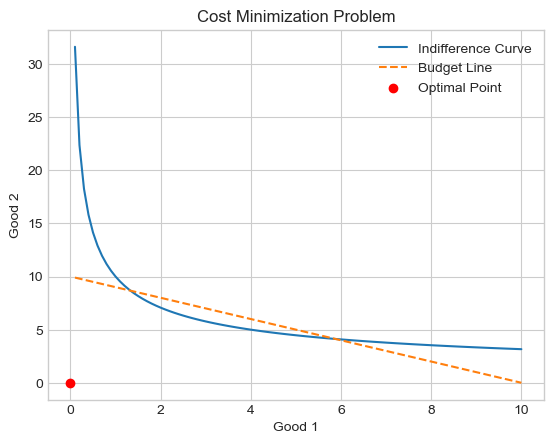

In [41]:
# This is not a solution, but should work as inspiration if you chose to solve this extra problem :)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Cobb-Douglas utility function
def utility_function(x1, alpha, u0):
    x2 = u0 / x1**alpha
    return x2

# Set prices and required utility
p1, p2 = 1, 1
u0 = 10
alpha = 0.5  # Define alpha

# Define the cost minimization objective function
def cost_minimization(x, p1, p2):
    return p1 * x[0] + p2 * x[1]

# Utility constraint function
def utility_constraint(x, alpha, u0):
    return x[0]**alpha * x[1]**(1 - alpha) - u0

# Initial guess
initial_guess = [0, 0]

# Optimization
result = minimize(cost_minimization, initial_guess, args=(p1, p2),
                  constraints={'type': 'eq', 'fun': utility_constraint, 'args': (alpha, u0)})

# Extract optimal values
x_optimal = result.x

# Plotting
x_values = np.linspace(0.1, 10, 100)
y_values = utility_function(x_values, alpha=alpha, u0=u0)

# Correct budget line based on prices p1 and p2
budget_line = (u0 / p2) - (p1 / p2) * x_values

plt.plot(x_values, y_values, label='Indifference Curve')
plt.plot(x_values, budget_line, label='Budget Line', linestyle='--')
plt.scatter(x_optimal[0], x_optimal[1], color='red', label='Optimal Point')

plt.xlabel('Good 1')
plt.ylabel('Good 2')
plt.title('Cost Minimization Problem')
plt.legend()
plt.show()

## Classy solution

**Problem:** Implement your solution to the utility maximization problem and/or the cost minimization problem above in a class as seen in Lecture 3. 